In [1]:
!pip install keras

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
import keras.backend.tensorflow_backend as ktf


def get_session(gpu_fraction=0.8):
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction,
                                allow_growth=True)
    return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


ktf.set_session(get_session())

Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.applications import MobileNet
#from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam as Adam

In [4]:
base_model=MobileNet(include_top=False, weights='../mobilenet_1_0_224_tf_no_top.h5', input_shape=(224,224,3))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [5]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Dropout
# model= Sequential()
# model.add(base_model)
# model.add(Conv2D(64, (3, 3), activation = 'relu'))
# model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
# #model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.30))
# model.add(Conv2D(64, (3, 3), activation = 'relu'))
# model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.30))
# model.add(Flatten())

# model.add(Dense(1, activation='sigmoid'))


In [6]:
#model.load_weights("../../ResNet50 Weights/ResNet50final11.hdf5")

In [7]:
from tensorflow.keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=10,  
                                     zoom_range = 0.1, 
                                     width_shift_range=0.2,  height_shift_range=0.2) 

In [8]:
train_data= train_generator.flow_from_directory(
                                                batch_size=256,directory="/raid/Data/Master_Dataset/elvin/final_mix/train/",
                                                shuffle=True,class_mode="binary",target_size=(224,224))

Found 948603 images belonging to 2 classes.


In [9]:
train_data.class_indices

{'fake': 0, 'real': 1}

In [10]:
test_generator=ImageDataGenerator(rescale = 1./255)

In [11]:
val_data= test_generator.flow_from_directory(
                                              directory="/raid/Data/Master_Dataset/elvin/final_mix/validation/",
                                              shuffle=True,batch_size=256,class_mode="binary",target_size=(224,224))

Found 518144 images belonging to 2 classes.


In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=.5, min_lr=0.0001)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [14]:
from tensorflow.keras.utils import multi_gpu_model

In [15]:
# parallel_model = multi_gpu_model(model, gpus=3)
# parallel_model.compile(loss='binary_crossentropy',
#                            optimizer=Adam(lr=0.001),metrics=["accuracy"])
# #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
# parallel_model.fit_generator(generator=train_data,
#                             steps_per_epoch=train_data.samples//train_data.batch_size,
#                             validation_data=val_data,
#                             verbose=1,
#                             validation_steps=val_data.samples//val_data.batch_size,
#                             epochs=3,callbacks=[learning_rate_reduction])

In [15]:
from matplotlib import pyplot
import sys

In [16]:
def summarize_diagnostics(history,epoch):
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.ylabel('Loss')
    pyplot.xlabel('Epochs')

    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epochs')

    pyplot.subplots_adjust(top=0.92, bottom=0.2, left=0.0, right=2.5, hspace=0.25,
                    wspace=0.25)
    pyplot.show()    


    #     pyplot.subplot(213)
    # 	pyplot.title('Classification Accuracy')
    # 	pyplot.plot(history.history['accuracy'], color='blue', label='train')
    # 	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename +'MobileNet'+str(epoch)+ '_plot.png')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
3706/3706 [==============================] - 14385s 4s/step - loss: 0.1654 - acc: 0.9309 - val_loss: 0.3596 - val_acc: 0.8313
Epoch 2/2
3706/3706 [==============================] - 14380s 4s/step - loss: 0.0868 - acc: 0.9667 - val_loss: 0.2891 - val_acc: 0.8767


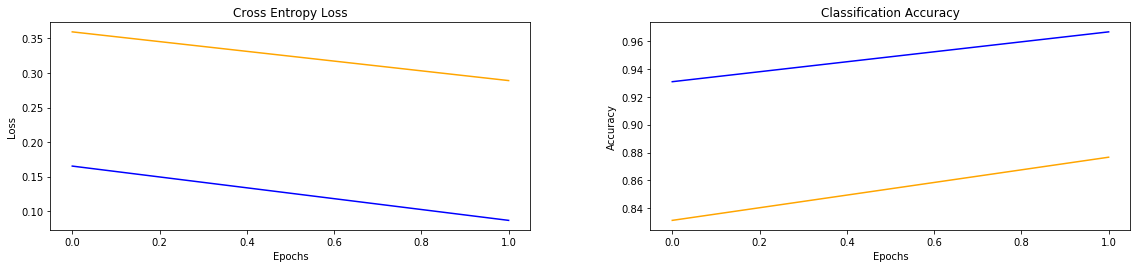

<Figure size 432x288 with 0 Axes>

In [18]:
from tensorflow.keras.utils import multi_gpu_model
#for y in [1,2,3,4,5,6,7,9,14]:
for y in [2]:
    try:
        location="BestWeights_epoch"+str(y)+ ".hdf5"
        #checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
        final_location=[]
        location=[]
        model= Sequential()
        model.add(base_model)
    # model.add(Conv2D(512, (3, 3), activation = 'relu'))

        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        #model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Flatten())
        model.add(Dense(512,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
        #model.load_weights("../../ResNet50 Weights/ResNet50final11.hdf5")

    # model.add(Conv2D(512, (3, 3), activation = 'relu'))



        #parallel_model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy',
                               optimizer=Adam(lr=0.001),metrics=["accuracy"])
    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
        history_model=model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=val_data,
                                verbose=1,
                                validation_steps=val_data.samples//val_data.batch_size,
                                epochs=y,callbacks=[learning_rate_reduction,es])

        model.save("MobileNet"+str(y)+".hdf5")
        summarize_diagnostics(history_model,y)
        loss=history_model.history['loss']
        acc=history_model.history['acc']
        valacc=history_model.history['val_acc']
        valloss=history_model.history['val_loss']
        location = [y,loss,acc,valacc, valloss]
        final_location.append(location)
        save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
        save1.to_csv('MobileNet'+str(y)+'.csv')
    except Exception as e: 
        print(e)
        continue
    


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/4
2024/2024 [==============================] - 1965s 971ms/step - loss: 0.4697 - acc: 0.7776

Epoch 00001: val_acc improved from -inf to 0.77761, saving model to BestWeights_epoch4.hdf5
3706/3706 [==============================] - 13380s 4s/step - loss: 0.1648 - acc: 0.9311 - val_loss: 0.4697 - val_acc: 0.7776
Epoch 2/4
2024/2024 [==============================] - 1877s 928ms/step - loss: 0.4768 - acc: 0.8366

Epoch 00002: val_acc improved from 0.77761 to 0.83662, saving model to BestWeights_epoch4.hdf5
3706/3706 [==============================] - 13302s 4s/step - loss: 0.0865 - acc: 0.9666 - val_loss: 0.4768 - val_acc: 0.8366
Epoch 3/4
2024/2024 [==============================] - 1799s 889ms/step - loss: 0.3002 - acc: 0.8687

Epoch 00003: val_acc improved from 0.83662 to 0.86873, saving model to BestWeights_epoch4.hd

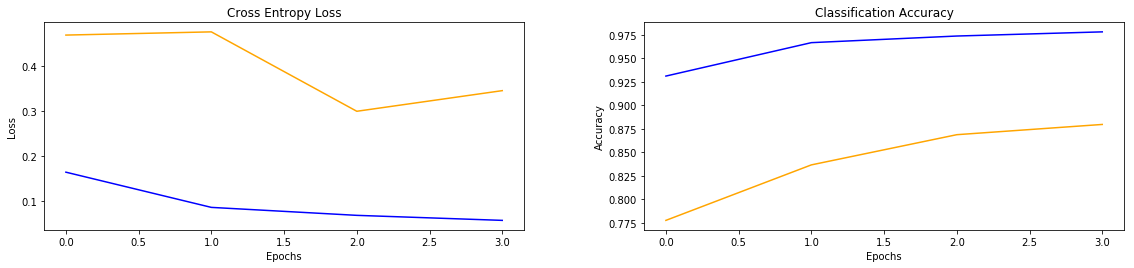

<Figure size 432x288 with 0 Axes>

In [17]:
from tensorflow.keras.utils import multi_gpu_model
#for y in [1,2,3,4,5,6,7,9,14]:
for y in [4]:
    try:
        location="BestWeights_epoch"+str(y)+ ".hdf5"
        checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
        final_location=[]
        location=[]
        model= Sequential()
        model.add(base_model)
    # model.add(Conv2D(512, (3, 3), activation = 'relu'))

        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        #model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Flatten())
        model.add(Dense(512,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
        #model.load_weights("../../ResNet50 Weights/ResNet50final11.hdf5")

    # model.add(Conv2D(512, (3, 3), activation = 'relu'))



        #parallel_model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy',
                               optimizer=Adam(lr=0.001),metrics=["accuracy"])
    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
        history_model=model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=val_data,
                                verbose=1,
                                validation_steps=val_data.samples//val_data.batch_size,
                                epochs=y,callbacks=[learning_rate_reduction,es,checkpointer])

        model.save("MobileNet"+str(y)+".hdf5")
        summarize_diagnostics(history_model,y)
        loss=history_model.history['loss']
        acc=history_model.history['acc']
        valacc=history_model.history['val_acc']
        valloss=history_model.history['val_loss']
        location = [y,loss,acc,valacc, valloss]
        final_location.append(location)
        save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
        save1.to_csv('MobileNet'+str(y)+'.csv')
    except Exception as e: 
        print(e)
        continue

Epoch 1/6
2024/2024 [==============================] - 1840s 909ms/step - loss: 0.4144 - acc: 0.8809

Epoch 00001: val_acc improved from -inf to 0.88086, saving model to BestWeights_epoch6.hdf5
3706/3706 [==============================] - 12233s 3s/step - loss: 0.0491 - acc: 0.9817 - val_loss: 0.4144 - val_acc: 0.8809
Epoch 2/6
2024/2024 [==============================] - 1889s 934ms/step - loss: 0.4077 - acc: 0.8836

Epoch 00002: val_acc improved from 0.88086 to 0.88360, saving model to BestWeights_epoch6.hdf5
3706/3706 [==============================] - 12958s 3s/step - loss: 0.0434 - acc: 0.9838 - val_loss: 0.4077 - val_acc: 0.8836
Epoch 3/6
2024/2024 [==============================] - 1955s 966ms/step - loss: 0.3885 - acc: 0.8854

Epoch 00003: val_acc improved from 0.88360 to 0.88539, saving model to BestWeights_epoch6.hdf5
3706/3706 [==============================] - 13449s 4s/step - loss: 0.0385 - acc: 0.9856 - val_loss: 0.3885 - val_acc: 0.8854
Epoch 4/6
2024/2024 [=============

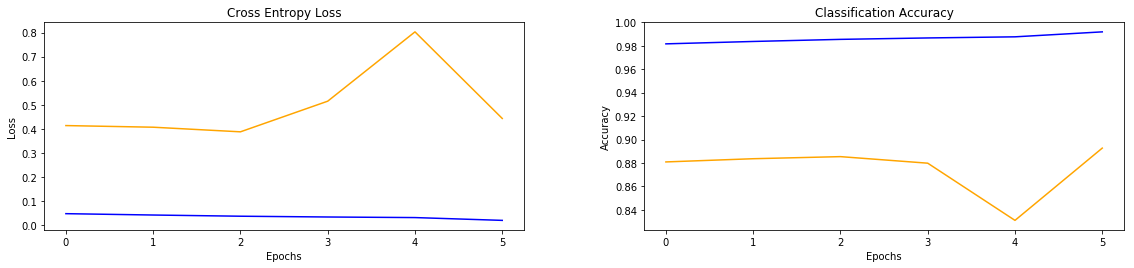

<Figure size 432x288 with 0 Axes>

In [18]:
from tensorflow.keras.utils import multi_gpu_model
#for y in [1,2,3,4,5,6,7,9,14]:
for y in [6]:
    try:
        location="BestWeights_epoch"+str(y)+ ".hdf5"
        checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
        final_location=[]
        location=[]
        model= Sequential()
        model.add(base_model)
    # model.add(Conv2D(512, (3, 3), activation = 'relu'))

        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        #model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Conv2D(64, (3, 3), activation = 'relu'))
        #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
        model.add(MaxPooling2D(pool_size = (2, 2)))
        model.add(Dropout(0.40))
        model.add(Flatten())
        model.add(Dense(512,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
        #model.load_weights("../../ResNet50 Weights/ResNet50final11.hdf5")

    # model.add(Conv2D(512, (3, 3), activation = 'relu'))



        #parallel_model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy',
                               optimizer=Adam(lr=0.001),metrics=["accuracy"])
    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
        history_model=model.fit_generator(generator=train_data,
                                steps_per_epoch=train_data.samples//train_data.batch_size,
                                validation_data=val_data,
                                verbose=1,
                                validation_steps=val_data.samples//val_data.batch_size,
                                epochs=y,callbacks=[learning_rate_reduction,es,checkpointer])

        model.save("MobileNet"+str(y)+".hdf5")
        summarize_diagnostics(history_model,y)
        loss=history_model.history['loss']
        acc=history_model.history['acc']
        valacc=history_model.history['val_acc']
        valloss=history_model.history['val_loss']
        location = [y,loss,acc,valacc, valloss]
        final_location.append(location)
        save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
        save1.to_csv('MobileNet'+str(y)+'.csv')
    except Exception as e: 
        print(e)
        continue